In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!export CUDA_VISIBLE_DEVICES=1
import pandas as pd
import nltk #Natural Language Toolkit
import numpy as np
google=pd.read_csv("/content/drive/MyDrive/masterthesis/googleplaystore_user_reviews.csv")
#google=pd.read_csv("E:/TSINGHUA AUTUMN SEMESTER/Machine Learning/NLP_Project/IMBD_Dataset.csv")
google.head()
index_with_nan = google.index[google.isnull().any(axis=1)]
google.drop(index_with_nan,0, inplace=True)
google = google.sample(frac=0.5)
#google.drop(google.index[10000:64230],0,inplace=True)
print(google)

                                                     App  \
1388                                         8 Ball Pool   
16807                           Booking.com Travel Deals   
39042                     Eat Fit - Diet and Health Free   
7897                               Animated Photo Editor   
63459  Horoscopes – Daily Zodiac Horoscope and Astrology   
...                                                  ...   
11277  Baby ABC in box! Kids alphabet games for toddl...   
4480                                Advanced Task Killer   
3377                                 ASUS Sound Recorder   
10567                        BBW Dating & Plus Size Chat   
59091                                        HTC Gallery   

                                       Translated_Review Sentiment  \
1388   I really enjoy playing. Great graphics. Never ...  Positive   
16807  I lost $200 app, I choose Araras hotel due pic...  Positive   
39042  Great idea content really there. This great id...  Positive   

In [ ]:
text=google['Translated_Review']
print(text)
print(google['Sentiment'])
text.shape[0]

1388     I really enjoy playing. Great graphics. Never ...
16807    I lost $200 app, I choose Araras hotel due pic...
39042    Great idea content really there. This great id...
7897                                             Holy Juer
63459                         It's good I can't 2018 exist
                               ...                        
11277    Its amazing sometimes freeze stop working till...
4480     This BEST task killer UNTIL I updated phone. T...
3377                                                  Nice
10567                                       It really nice
59091    Photo editor work!!! The first time I tried fe...
Name: Translated_Review, Length: 18714, dtype: object
1388     Positive
16807    Positive
39042    Positive
7897      Neutral
63459    Positive
           ...   
11277    Positive
4480     Positive
3377     Positive
10567    Positive
59091    Positive
Name: Sentiment, Length: 18714, dtype: object


18714

In [ ]:
import re #Regular Expression

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = stopwords.words('english')
stop_words.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import string
punct=string.punctuation
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
cleanedtext=[]
for i in range (len(text)):
    review=re.sub('[^a-zA-Z]', ' ', str(text.iloc[i])) #if not str(text[i]) --> expected string or bytes-like object sub(pattern, repl, string, count, flags)
    review=review.lower().split()  # .str.lower() ? 
    #review=[PorterStemmer().stem(word) for word in review if (word not in stop_words) and (word not in punct)]
    review=[WordNetLemmatizer().lemmatize(word) for word in review if (word not in stop_words) and (word not in punct)]
    review=' '.join(review)
    cleanedtext.append(review)

In [ ]:
google['Sentiment']=google.Sentiment.astype('category')

In [ ]:
google.info()
google.Sentiment.unique

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 1388 to 59091
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     18714 non-null  object  
 1   Translated_Review       18714 non-null  object  
 2   Sentiment               18714 non-null  category
 3   Sentiment_Polarity      18714 non-null  float64 
 4   Sentiment_Subjectivity  18714 non-null  float64 
dtypes: category(1), float64(2), object(2)
memory usage: 749.4+ KB


<bound method Series.unique of 1388     Positive
16807    Positive
39042    Positive
7897      Neutral
63459    Positive
           ...   
11277    Positive
4480     Positive
3377     Positive
10567    Positive
59091    Positive
Name: Sentiment, Length: 18714, dtype: category
Categories (3, object): ['Negative', 'Neutral', 'Positive']>

In [ ]:
google.Sentiment.cat.codes

1388     2
16807    2
39042    2
7897     1
63459    2
        ..
11277    2
4480     2
3377     2
10567    2
59091    2
Length: 18714, dtype: int8

In [ ]:
google['Sentiment']=google.Sentiment.cat.codes
google.Sentiment

1388     2
16807    2
39042    2
7897     1
63459    2
        ..
11277    2
4480     2
3377     2
10567    2
59091    2
Name: Sentiment, Length: 18714, dtype: int8

In [ ]:
google.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1388,8 Ball Pool,I really enjoy playing. Great graphics. Never ...,2,0.133333,0.716667
16807,Booking.com Travel Deals,"I lost $200 app, I choose Araras hotel due pic...",2,0.045833,0.495833
39042,Eat Fit - Diet and Health Free,Great idea content really there. This great id...,2,0.400000,0.664286
7897,Animated Photo Editor,Holy Juer,1,0.000000,0.000000
63459,Horoscopes – Daily Zodiac Horoscope and Astrology,It's good I can't 2018 exist,2,0.700000,0.600000


In [ ]:
!pip install transformers

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, TFDistilBertForSequenceClassification
num_classes = 3
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# specify the directory path where you want to save the model and tokenizer
dir_path = '/content/drive/MyDrive/masterthesis/'

# save the tokenizer
tokenizer.save_pretrained(dir_path + 'bert-tokenizer')

# save the model
model.save_pretrained(dir_path + 'bert-model')

In [ ]:
google_cleaned=google.copy()
google_cleaned=google_cleaned[['Translated_Review','Sentiment']]
google_cleaned['Translated_Review']=cleanedtext
google_cleaned.head()

,Translated_Review,Sentiment
1388,really enjoy playing great graphic never probl...,2
16807,lost app choose araras hotel due picture booki...,2
39042,great idea content really great idea app like ...,2
7897,holy juer,1
63459,good exist,2


In [ ]:
from sklearn.model_selection import train_test_split
google_train,google_test=train_test_split(google_cleaned, test_size=0.3, random_state=42, stratify=google_cleaned.Sentiment) #Random state for random fixed manner to split.

In [ ]:
google_train.shape

(13099, 2)

In [ ]:
google_test.shape

(5615, 2)

In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(google_train.Sentiment)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
max_length=max([len(x.split()) for x in cleanedtext])
print (max_length)

152


In [ ]:
text_trainBERT=tokenizer(
    text=google_train.Translated_Review.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

text_testBERT=tokenizer(
    text=google_test.Translated_Review.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
tokenizer("This is my master final project")

{'input_ids': [101, 2023, 2003, 2026, 3040, 2345, 2622, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
text_trainBERT

{'input_ids': <tf.Tensor: shape=(13099, 152), dtype=int32, numpy=
array([[  101,  4773,  2544, ...,     0,     0,     0],
       [  101,  2204,   102, ...,     0,     0,     0],
       [  101,  2307, 10439, ...,     0,     0,     0],
       ...,
       [  101, 17159, 10978, ...,     0,     0,     0],
       [  101, 20221,  3477, ...,     0,     0,     0],
       [  101,  2204,  3074, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(13099, 152), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices('GPU')
#gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.80) 
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True, gpu_options=gpu_options))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#PERZONALIZATION AND CONFIGURATION OF THE MODEL
# Unfreeze some of the pre-trained layers
for layer in model.layers[-4:]:
    layer.trainable = True

input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

outputs = model([input_ids, attention_mask])
# Define the final layer for classification
sentiment = tf.keras.layers.Dense(num_classes, name='sentiment')(outputs[0])

# Apply softmax activation outside of the model for better numerical stability
sentiment = tf.keras.layers.Activation('softmax', name='softmax_activation')(sentiment)

BERTmodel = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=sentiment)

#SAVE MODEL BEFORE TRAINING : 
BERTmodel=model.save_pretrained(dir_path + 'bert-model')

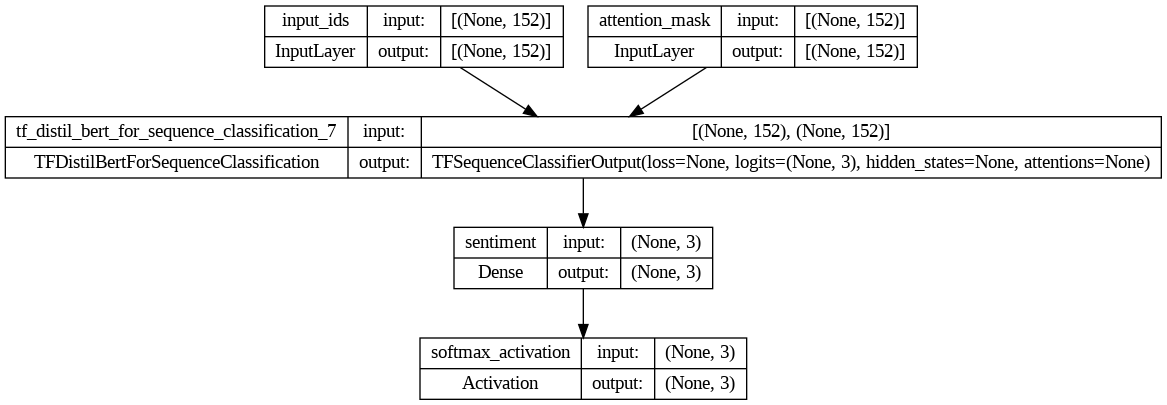

In [ ]:
tf.keras.utils.plot_model(BERTmodel, show_shapes=True)

In [ ]:
BERTmodel.layers

In [ ]:
BERTmodel.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 152)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 152)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66955779   ['input_ids[0][0]',              
 assification_7 (TFDistilBertFo  rOutput(loss=None,               'attention_mask[0][0]']         
 rSequenceClassification)       logits=(None, 3),                                                 
                                 hidden_states=None                                        

In [ ]:
from tensorflow.keras.optimizers.experimental import AdamW

In [ ]:
#TRAINING PART
optimizer = AdamW(
    learning_rate=2e-5, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    clipnorm=1.0,
    weight_decay=0.01
)

# Set loss and metrics
loss = CategoricalCrossentropy()
metric = CategoricalAccuracy()

# Compile the model
BERTmodel.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric
)

In [ ]:
#tf.config.experimental_run_functions_eagerly(True)
#tf.config.run_functions_eagerly(True)

In [ ]:
train_history = BERTmodel.fit(
  x ={'input_ids':text_trainBERT['input_ids'],'attention_mask':text_trainBERT['attention_mask']} ,
  y = to_categorical(google_train.Sentiment),
  validation_data = (
  {'input_ids':text_testBERT['input_ids'],'attention_mask':text_testBERT['attention_mask']}, to_categorical(google_test.Sentiment)
  ),
  epochs=10,
  batch_size=64
)

Epoch 1/10
205/205 [==============================] - 299s 1s/step - loss: 0.5635 - categorical_accuracy: 0.7837 - val_loss: 0.3141 - val_categorical_accuracy: 0.8949
Epoch 2/10
205/205 [==============================] - 226s 1s/step - loss: 0.2545 - categorical_accuracy: 0.9161 - val_loss: 0.2636 - val_categorical_accuracy: 0.9097
Epoch 3/10
205/205 [==============================] - 226s 1s/step - loss: 0.1802 - categorical_accuracy: 0.9453 - val_loss: 0.2576 - val_categorical_accuracy: 0.9179
Epoch 4/10
205/205 [==============================] - 226s 1s/step - loss: 0.1251 - categorical_accuracy: 0.9651 - val_loss: 0.2603 - val_categorical_accuracy: 0.9264
Epoch 5/10
205/205 [==============================] - 226s 1s/step - loss: 0.0935 - categorical_accuracy: 0.9757 - val_loss: 0.2693 - val_categorical_accuracy: 0.9279
Epoch 6/10
205/205 [==============================] - 214s 1s/step - loss: 0.0781 - categorical_accuracy: 0.9785 - val_loss: 0.2935 - val_categorical_accuracy: 0.921

In [ ]:
import json
# save the training history
with open(dir_path + 'history.json', 'w') as f:
    json.dump(train_history.history, f)

In [ ]:
BERTmodel.save_weights(dir_path + 'sentiment_weights.h5')

In [ ]:
BERTmodel.load_weights(dir_path + 'sentiment_weights.h5')

In [ ]:
predBERT=BERTmodel.predict({'input_ids':text_testBERT['input_ids'],'attention_mask':text_testBERT['attention_mask']})

176/176 [==============================] - 32s 171ms/step


In [ ]:
predBERT[0]

array([1.4108584e-03, 5.5303145e-04, 9.9803609e-01], dtype=float32)

In [ ]:
pred_Sentiment = np.argmax(predBERT, axis = 1)
true_Sentiment = google_test.Sentiment

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_Sentiment, pred_Sentiment))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1238
           1       0.91      0.85      0.88       760
           2       0.94      0.96      0.95      3617

    accuracy                           0.92      5615
   macro avg       0.91      0.89      0.90      5615
weighted avg       0.92      0.92      0.92      5615



In [ ]:
!pip install transformers
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.0 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import nltk #Natural Language Toolkit
import numpy as np

import re #Regular Expression

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import string
nltk.download('omw-1.4')

import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.layers import Input

# specify the directory path where you want to save the model and tokenizer
dir_path = '/content/drive/MyDrive/masterthesis/'

# load the data and preprocess
reviews=pd.read_csv("/content/drive/MyDrive/masterthesis/translated_reviews.csv")
reviews.head()
index_with_nan = reviews.index[reviews.isnull().any(axis=1)]
reviews.drop(index_with_nan,0, inplace=True)
#reviews = reviews.sample(frac=0.1)
print(reviews)

text=reviews['translated_comment']
print(text)
text.shape[0]

stop_words = stopwords.words('english')
stop_words.remove('not')
punct=string.punctuation

cleanedtext=[]
for i in range (len(text)):
    review=re.sub('[^a-zA-Z]', ' ', str(text.iloc[i])) #if not str(text[i]) --> expected string or bytes-like object sub(pattern, repl, string, count, flags)
    review=review.lower().split()  # .str.lower() ? 
    #review=[PorterStemmer().stem(word) for word in review if (word not in stop_words) and (word not in punct)]
    review=[WordNetLemmatizer().lemmatize(word) for word in review if (word not in stop_words) and (word not in punct)]
    review=' '.join(review)
    cleanedtext.append(review)

reviews_cleaned=reviews.copy()
reviews_cleaned=reviews_cleaned[['translated_comment']]
reviews_cleaned['translated_comment']=cleanedtext
reviews_cleaned.head()

max_length=max([len(x.split()) for x in cleanedtext])
num_classes = 3
print(max_length)

# load the TOKENIZER before prediction
tokenizer=AutoTokenizer.from_pretrained(dir_path + 'bert-tokenizer')

text_reviewsBERT=tokenizer(
    text=reviews_cleaned.translated_comment.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-20-1c5ea2b70fbd>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reviews.drop(index_with_nan,0, inplace=True)


                                  reviewId           userName  score  \
0     e1aeca72-bec3-4c26-a170-9fe49b8c7d9d   Corentin Prigent    5.0   
1     388a0e9e-d7a3-4f19-b792-2df821b6da3f    claude leclercq    3.0   
2     46463794-2169-4191-b3f2-136f7ade6760      Timothée Brun    5.0   
3     2d4a1f11-652e-4442-8629-7f56ad511240     Olivier FEBWIN    4.0   
4     8eeb4d02-2b8e-422c-93d8-3ef125239e50      Baptiste Piat    4.0   
...                                    ...                ...    ...   
9995  71fbfa7b-fae5-44f8-814a-73b22ed39fbe     christine Tune    5.0   
9996  0c6da2a3-3239-4130-8d08-19a5bfc4599f     julien Mallory    3.0   
9997  bcdc0a83-75af-4d6e-8e51-37212242f503   TERMEAU PHILIPPE    5.0   
9998  5d5940ee-6075-41c5-80d6-452b506f4cb2  daniele rodrigues    5.0   
9999  611e3235-84cf-41c1-a9c7-6da4d78fdea8    Gerard Danbakli    5.0   

      thumbsUpCount                   at  \
0            3387.0  2022-02-13 05:56:53   
1            2511.0  2021-04-06 06:40:05   
2  

In [ ]:
from transformers import TFAutoModel
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, TFDistilBertForSequenceClassification
#PERZONALIZATION AND CONFIGURATION OF THE MODEL
# load the model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)
# Unfreeze some of the pre-trained layers
for layer in model.layers[-4:]:
    layer.trainable = True

input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids") #need to redifine it because max_length of the new dataset > the training dataset
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

outputs = model([input_ids, attention_mask])
# Define the final layer for classification
sentiment = tf.keras.layers.Dense(num_classes, name='sentiment')(outputs[0])

# Apply softmax activation outside of the model for better numerical stability
sentiment = tf.keras.layers.Activation('softmax', name='softmax_activation')(sentiment)

BERTmodel = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=sentiment)
tf.keras.utils.plot_model(BERTmodel, show_shapes=True)
BERTmodel.summary()


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_387']
You should probably TRAIN this model on a down-stream task to be able to use 

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 506)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 506)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66955779   ['input_ids[0][0]',              
 assification_7 (TFDistilBertFo  rOutput(loss=None,               'attention_mask[0][0]']         
 rSequenceClassification)       logits=(None, 3),                                                 
                                 hidden_states=None                                        

In [ ]:
BERTmodel.load_weights(dir_path + 'sentiment_weights.h5')

In [ ]:
sentiment_probs = BERTmodel.predict({'input_ids': text_reviewsBERT['input_ids'], 'attention_mask': text_reviewsBERT['attention_mask']})

304/304 [==============================] - 206s 663ms/step


In [ ]:
comment_sentiment = tf.argmax(sentiment_probs, axis=1)
reviews['comment_sentiment'] = comment_sentiment

In [ ]:
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
reviews['sentiment_label'] = reviews['comment_sentiment'].map(label_map)
print (reviews)

                                  reviewId           userName  score  \
0     e1aeca72-bec3-4c26-a170-9fe49b8c7d9d   Corentin Prigent    5.0   
1     388a0e9e-d7a3-4f19-b792-2df821b6da3f    claude leclercq    3.0   
2     46463794-2169-4191-b3f2-136f7ade6760      Timothée Brun    5.0   
3     2d4a1f11-652e-4442-8629-7f56ad511240     Olivier FEBWIN    4.0   
4     8eeb4d02-2b8e-422c-93d8-3ef125239e50      Baptiste Piat    4.0   
...                                    ...                ...    ...   
9995  71fbfa7b-fae5-44f8-814a-73b22ed39fbe     christine Tune    5.0   
9996  0c6da2a3-3239-4130-8d08-19a5bfc4599f     julien Mallory    3.0   
9997  bcdc0a83-75af-4d6e-8e51-37212242f503   TERMEAU PHILIPPE    5.0   
9998  5d5940ee-6075-41c5-80d6-452b506f4cb2  daniele rodrigues    5.0   
9999  611e3235-84cf-41c1-a9c7-6da4d78fdea8    Gerard Danbakli    5.0   

      thumbsUpCount                   at  \
0            3387.0  2022-02-13 05:56:53   
1            2511.0  2021-04-06 06:40:05   
2  

In [ ]:
negative_count = reviews['sentiment_label'].value_counts()[0]
print("Number of negative reviews:", negative_count)
neutral_count = reviews['sentiment_label'].value_counts()[1]
print("Number of neutral reviews:", neutral_count)
positive_count = reviews['sentiment_label'].value_counts()[2]
print("Number of positive reviews:", positive_count)
total=negative_count+neutral_count+positive_count
print("total review:", total)

Number of negative reviews: 4853
Number of neutral reviews: 2720
Number of positive reviews: 2140
total review: 9713


In [ ]:
reviews.to_csv(dir_path + 'translated_reviews_sentiments.csv', index=False)